Используем декомпозицию трендов библиотеки Prophet для прогнозирования

![PROPHET](1_14.jpg)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')
#from autonotebook import tqdm as notebook_tqdm
from ipywidgets import FloatProgress

In [5]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [6]:
data = pd.read_csv("ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"], date_parser=dateparse, parse_dates=['Дата'])
data = data.drop("Ипотека", axis=1)
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс
0,2022-01-11,75.1315
1,2022-01-12,74.8355
2,2022-01-13,74.5277
3,2022-01-14,74.5686
4,2022-01-15,75.7668


## Строим модель

In [7]:
data.columns = ["ds", "y", "z"]
data[:-11]

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [ ]:
model = Prophet()
model.fit(data[:-11])

22:38:48 - cmdstanpy - INFO - Chain [1] start processing
22:38:48 - cmdstanpy - INFO - Chain [1] done processing


## Визуализация результата

In [ ]:
forecast_ds = model.make_future_dataframe(periods=11)
forecast = model.predict(forecast_ds)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
154,2022-08-20,59.976611,49.980458,65.391722,59.753490,60.185526,-2.405137,-2.405137,-2.405137,-2.405137,-2.405137,-2.405137,0.0,0.0,0.0,57.571475
155,2022-08-21,59.976843,61.864432,77.102637,59.675313,60.270020,9.748871,9.748871,9.748871,9.748871,9.748871,9.748871,0.0,0.0,0.0,69.725715
156,2022-08-22,59.977075,52.628014,68.845802,59.588332,60.376403,0.927603,0.927603,0.927603,0.927603,0.927603,0.927603,0.0,0.0,0.0,60.904678
157,2022-08-23,59.977307,49.701446,65.727991,59.507173,60.498852,-2.093695,-2.093695,-2.093695,-2.093695,-2.093695,-2.093695,0.0,0.0,0.0,57.883612
158,2022-08-24,59.977539,49.729132,64.950288,59.398868,60.580004,-2.693105,-2.693105,-2.693105,-2.693105,-2.693105,-2.693105,0.0,0.0,0.0,57.284434


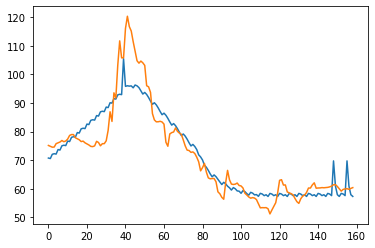

In [ ]:
plt.plot(forecast["yhat"])
plt.plot(data["y"])
plt.show()

Оценим ошибку

In [ ]:
print ("Ошибка модели:", smape(data["y"][-10:], forecast["yhat"][-10:]))

Ошибка модели: 44.16207863513154
